In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [2]:
def generate_data(m):
    # returns the true w as well as X, Y data
    mu=np.zeros(10)
    cov=np.identity(10)
    
    w=np.random.normal(0, 1,10) 
    norm_w= np.sqrt(np.sum(w*w))
    w_normalized=w/norm_w
    X=np.random.multivariate_normal(mu, cov, m)  
    x_wT=np.matmul(X,w_normalized.transpose())
    random_uniform=np.random.uniform(0,1,m)
    sig = 1/(1 + np.exp(-x_wT))
    y=np.array([1 if random_uniform[i]<=sig[i] else 0 for i in range(len(random_uniform))])
    
    return X,y,w_normalized


## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [3]:
from sklearn.linear_model import LogisticRegression
def logistic(X,y):
    clf = LogisticRegression(max_iter=1000).fit(X, y)
    coef = clf.coef_
    return np.array(coef)





## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def gradient_loss(w,x,y):
    wT_x=np.matmul(x,w.transpose())
    gradient=(sigmoid(wT_x)-y)*sigmoid(wT_x)*(1-sigmoid(wT_x))*x
    return gradient

def complete_gradient_loss(w,X,y):
    complete_gradient_loss=np.zeros(len(w))
    for i in range(len(y)):
        complete_gradient_loss= complete_gradient_loss+gradient_loss(w,X[i,:],y[i])
    gradient_loss_av=1/len(y)*complete_gradient_loss
    return gradient_loss_av



def gradient_descent_algoritm(X,y):
    eta=0.01
    w_old=np.zeros(X.shape[1])
    for i in range(1000):
        w_new= w_old-eta*complete_gradient_loss(w_old,X,y)
        w_old=w_new
    return w_new

def stochastic_gradient_descent_algoritm(X,y):
    eta=0.01
    w_old=np.zeros(X.shape[1])
    for i in range(1000):
        random_direc=np.random.randint(0,len(y))
        w_new= w_old-eta*gradient_loss(w_old,X[random_direc,:],y[random_direc])
        w_old=w_new
    return w_new
    

    
    

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

Time overall (considering all m's) logistic--- 0.09052896499633789 seconds ---
Time overall  (considering all m's) gradient descend--- 53.4080171585083 seconds ---
Time overall (considering all m's)  stochastic gradient descend--- 0.5505900382995605 seconds ---


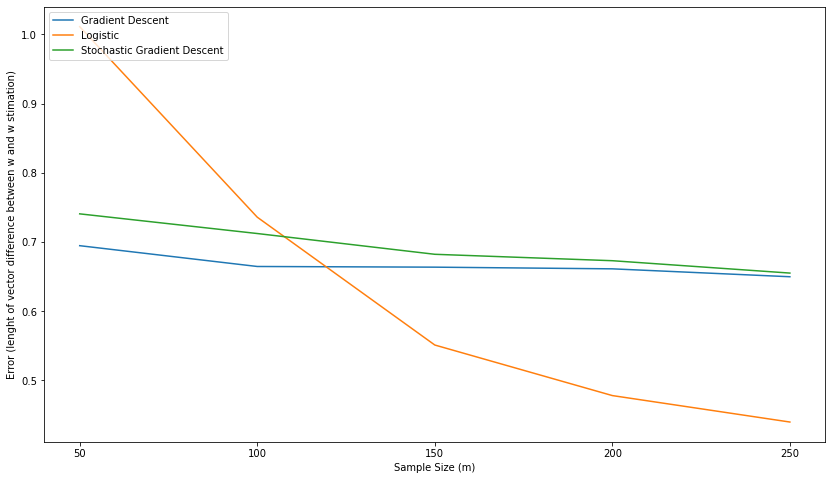

In [5]:
import time



def error(w,w_hat):
    error_=np.sqrt(np.sum((w-w_hat)*(w-w_hat)))
    return error_



m_to_use=[50,100,150,200,250]

errors_gradient_descent=[]
errors_logistic=[]
errors_stochastic=[]


start_time_logistic = time.time()


for m in m_to_use:   
    error_logistic=0
    for i in range(10):
        X,y,w=generate_data(m)
        
        w_logistic=logistic(X,y)
        error_logistic=error_logistic+error(w,w_logistic)
    errors_logistic.append(1/10*error_logistic)

time_overall_logistic=time.time()-start_time_logistic
print("Time overall (considering all m's) logistic--- %s seconds ---" % (time_overall_logistic))


start_time_gradient = time.time()

for m in m_to_use:
    error_gradient=0
    for i in range(10):
        X,y,w=generate_data(m)
        w_gradient_descent=gradient_descent_algoritm(X,y)
        error_gradient=error_gradient+error(w,w_gradient_descent)
    errors_gradient_descent.append(1/10*error_gradient)

time_overall_gradient=time.time()-start_time_gradient
print("Time overall  (considering all m's) gradient descend--- %s seconds ---" % (time_overall_gradient))



    
start_time_stochastic = time.time()

    
for m in m_to_use:      
    error_stochastic=0
    for i in range(10):
        X,y,w=generate_data(m)
        w_stochastic=stochastic_gradient_descent_algoritm(X,y)
        error_stochastic=error_stochastic+error(w,w_stochastic)
    errors_stochastic.append(1/10*error_stochastic)


time_overall_stochastic=time.time()-start_time_stochastic
print("Time overall (considering all m's)  stochastic gradient descend--- %s seconds ---" % (time_overall_stochastic))
        
FIGSIZE = (14,8)
plt.figure(figsize=FIGSIZE)
plt.plot(m_to_use,errors_gradient_descent,label="Gradient Descent")
plt.plot(m_to_use,errors_logistic,label="Logistic")
plt.plot(m_to_use,errors_stochastic,label="Stochastic Gradient Descent")

plt.xlabel("Sample Size (m)")
plt.ylabel("Error (lenght of vector difference between w and w stimation)")

plt.legend(loc='upper left')
plt.xticks(m_to_use)

plt.show()







# Problem 2

In [6]:
from sklearn import datasets

In [7]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

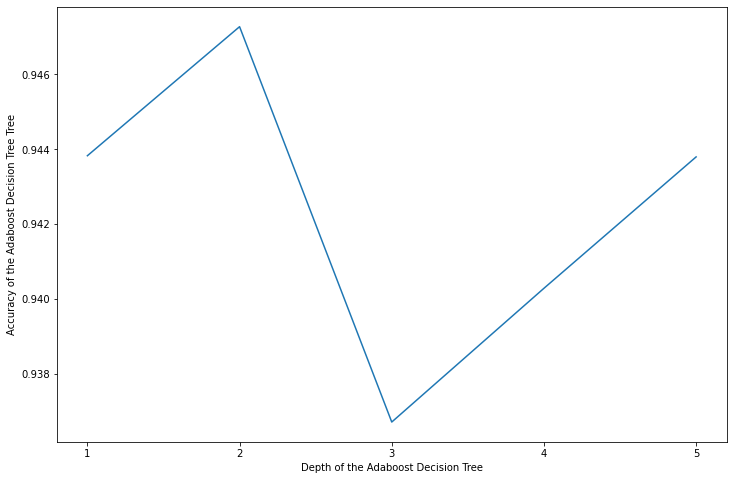

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score




X_cancer=cancer.data
y_cancer=cancer.target
RANDOM_STATE=101
av_cv_scores=[]

depths=[1,2,3,4,5]
for depth in depths:
    classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth,random_state=RANDOM_STATE),n_estimators=10,learning_rate=1,random_state=RANDOM_STATE)
    kfold = KFold(n_splits = 10, random_state=RANDOM_STATE,shuffle=True) 
    #Calculating the average of the cross validation scores
    av_cv_scores.append( sum(cross_val_score(classifier, X_cancer, y_cancer, cv=kfold))/10)

FIGSIZE = (12,8)
plt.figure(figsize=FIGSIZE)

plt.plot(depths,av_cv_scores)
plt.xticks(depths)
plt.xlabel("Depth of the Adaboost Decision Tree")
plt.ylabel("Accuracy of the Adaboost Decision Tree Tree")
plt.show()
    